In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("depression_anxiety_data.csv")

In [3]:
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [4]:
df.tail()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True
782,783,4,22,male,22.598140,Normal,6,Mild,False,False,False,False,6,Mild,False,False,False,0.0,False


In [5]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object

In [6]:
df.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [7]:
cat_to_fill = ['depressiveness', 'suicidal', 'depression_severity', 'depression_diagnosis', 'depression_treatment', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness']
for column in cat_to_fill:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

df['epworth_score'] = df['epworth_score'].fillna(df['epworth_score'].mean())


df.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [8]:
df = df.drop(["depressiveness", "bmi", "anxiousness", "sleepiness", "id"], axis=1)
df

,school_year,age,gender,who_bmi,phq_score,depression_severity,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiety_diagnosis,anxiety_treatment,epworth_score
0,1,19,male,Class I Obesity,9,Mild,False,False,False,11,Moderate,False,False,7.0
1,1,18,male,Normal,8,Mild,False,False,False,5,Mild,False,False,14.0
2,1,19,male,Overweight,8,Mild,False,False,False,6,Mild,False,False,6.0
3,1,18,female,Normal,19,Moderately severe,True,False,False,15,Severe,False,False,11.0
4,1,18,male,Overweight,6,Mild,False,False,False,14,Moderate,False,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,4,24,female,Normal,6,Mild,False,False,False,1,None-minimal,False,False,3.0
779,4,22,male,Overweight,4,None-minimal,False,False,False,6,Mild,False,False,3.0
780,4,22,male,Normal,2,None-minimal,False,False,False,5,Mild,False,False,4.0
781,4,22,female,Normal,17,Moderately severe,False,False,False,19,Severe,False,False,15.0


In [9]:
df["who_bmi"].unique()

array(['Class I Obesity', 'Normal', 'Overweight', 'Not Availble',
       'Class III Obesity', 'Underweight', 'Class II Obesity'],
      dtype=object)

kilo ve intihara meyil ilişkili olabilir mi?

C:\Users\Esma Ayan\AppData\Local\Temp\ipykernel_4120\1953815781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df["who_bmi"], y=df['suicidal'], palette = "deep", order= ("Not Availble", "Underweight", "Normal", "Owerweight", "Class I Obesity", "Class II Obesity", "Class III Obesity"))


<Axes: xlabel='who_bmi', ylabel='suicidal'>

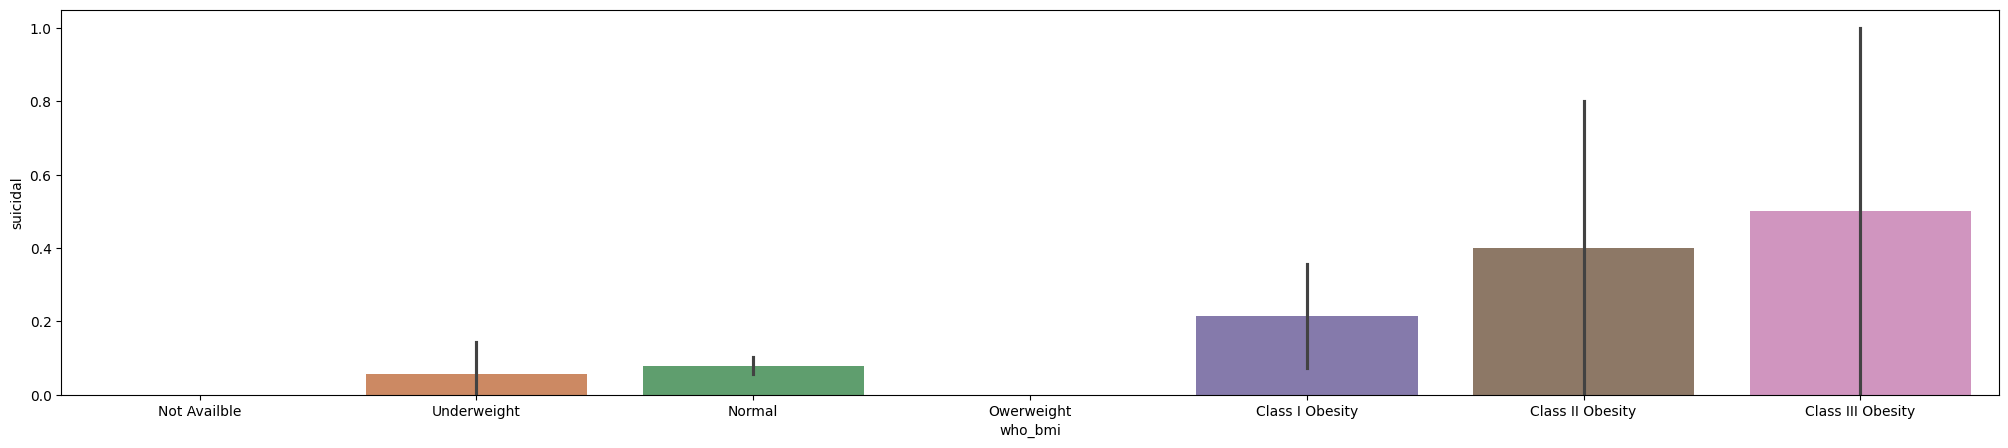

In [10]:
plt.figure(figsize=(25,5))
sns.barplot(x = df["who_bmi"], y=df['suicidal'], palette = "deep", order= ("Not Availble", "Underweight", "Normal", "Owerweight", "Class I Obesity", "Class II Obesity", "Class III Obesity"))

depresyona sahip kişilerde yas ve kilo arasında bi ilişki var mı?

In [11]:
grouped_data = df[df["anxiety_treatment"] == True].groupby(["age", "who_bmi"]).size().unstack(fill_value=0)
grouped_data

who_bmi,Class II Obesity,Normal,Not Availble,Overweight,Underweight
age,,,,,
18,0,3,0,2,0
19,1,12,0,4,1
20,0,8,0,5,0
21,0,7,1,2,2
22,0,6,1,1,0
23,0,2,0,0,0
24,0,0,0,1,0
26,0,1,0,0,0


anksiyetesi olan her insan depresyona sahip midir?

depresyonu olan her insan anksiyeteye sahip midir?

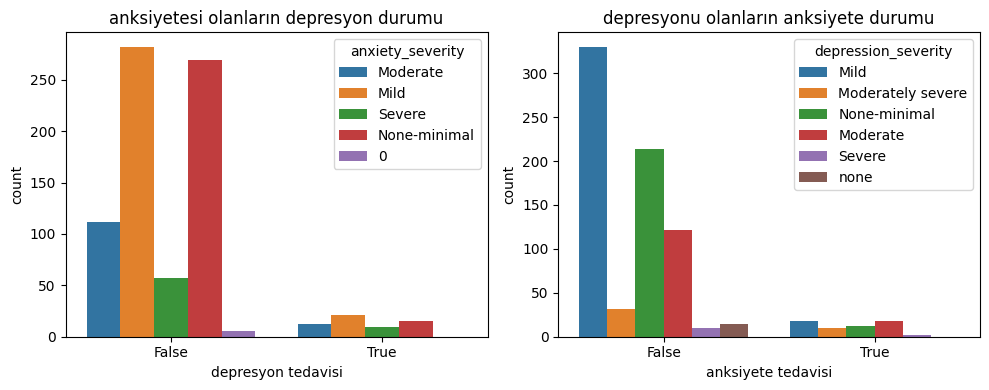

In [22]:
plt.figure(figsize=(10, 4))

# anksiyetesi olan her insanın depresyona sahip olup olmadığını gösteren çubuk grafik
plt.subplot(1, 2, 1)
depresyon_sahibi = df["depression_treatment"]== True
sns.countplot(data=df, x="depression_treatment", hue="anxiety_severity")
plt.xlabel("depresyon tedavisi")
plt.title("anksiyetesi olanların depresyon durumu")

# depresyonu olan her insanın anksiyeteye sahip olup olmadığını gösteren çubuk grafik
plt.subplot(1, 2, 2)
anksiyete_sahibi = df["anxiety_treatment"]== True
sns.countplot(data=df, x=anksiyete_sahibi, hue="depression_severity")
plt.xlabel("anksiyete tedavisi")
plt.title("depresyonu olanların anksiyete durumu")

plt.tight_layout()
plt.show()

yaşa bağlı olarak insanların phq ve gad skorları nasıl etkileniyor?

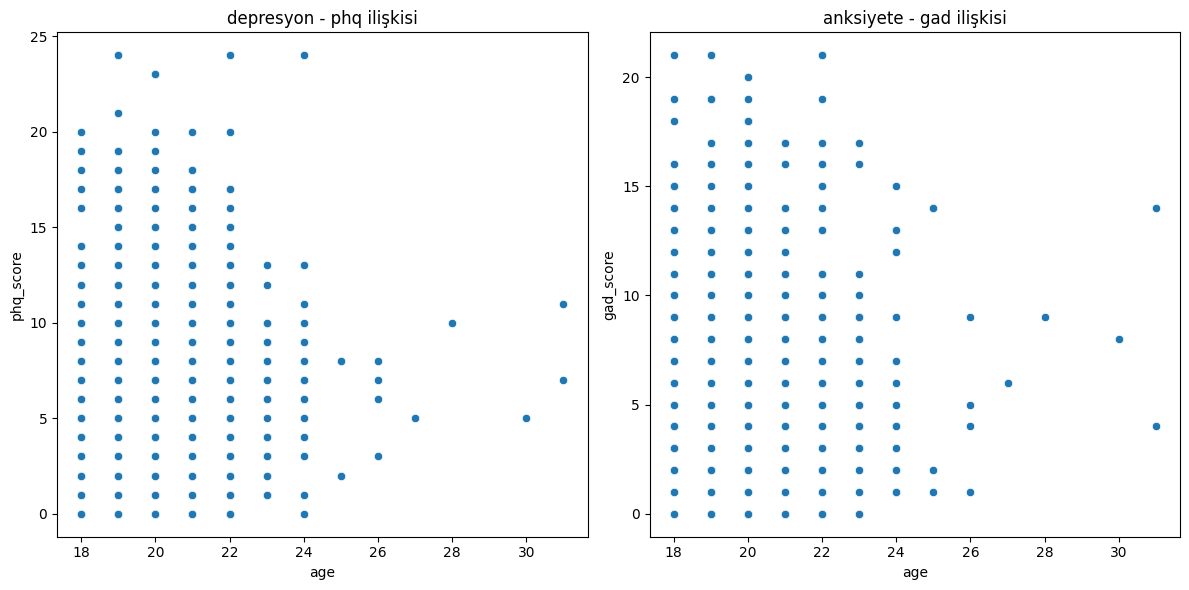

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 satır 2 sütundan oluşan bir grafik. bu birincisi demek 
sns.scatterplot(data = df, x = "age", y = "phq_score")
plt.title("depresyon - phq ilişkisi")

plt.subplot(1, 2, 2) # 1 satır 2 sütundan oluşan bir grafik. bu ikincisi demek 
sns.scatterplot(data = df, x = "age", y = "gad_score")
plt.title("anksiyete - gad ilişkisi")

plt.tight_layout()
plt.show()

depresyon ve anksiyete tedavisi en sık hangi yaşlarda alınmış?

In [14]:
df.head()

,school_year,age,gender,who_bmi,phq_score,depression_severity,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiety_diagnosis,anxiety_treatment,epworth_score
0,1,19,male,Class I Obesity,9,Mild,False,False,False,11,Moderate,False,False,7.0
1,1,18,male,Normal,8,Mild,False,False,False,5,Mild,False,False,14.0
2,1,19,male,Overweight,8,Mild,False,False,False,6,Mild,False,False,6.0
3,1,18,female,Normal,19,Moderately severe,True,False,False,15,Severe,False,False,11.0
4,1,18,male,Overweight,6,Mild,False,False,False,14,Moderate,False,False,3.0


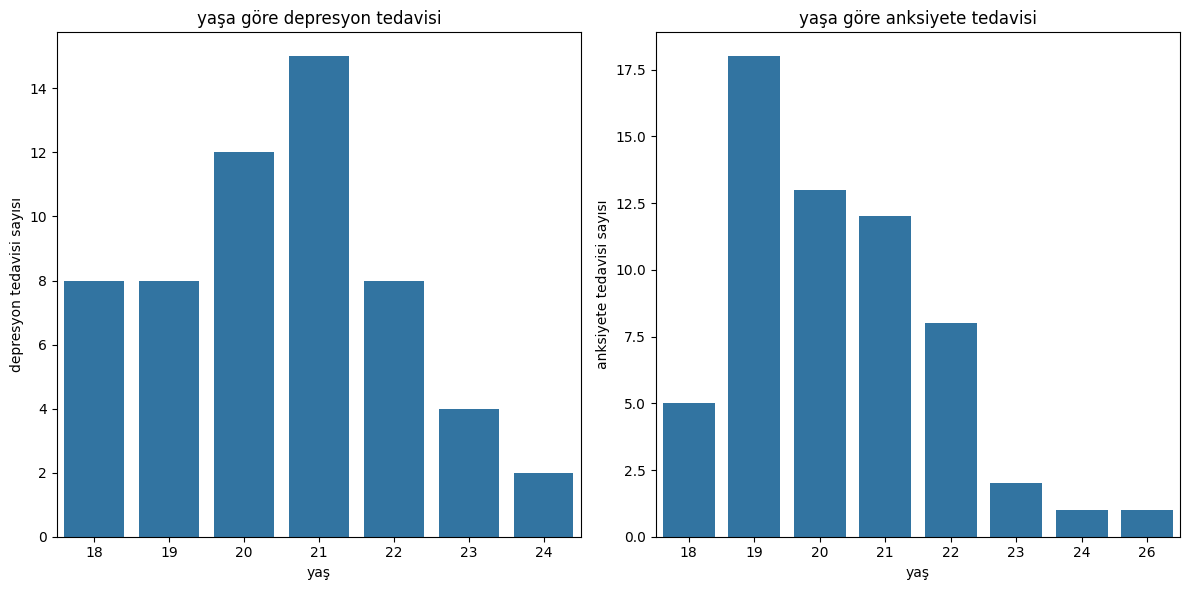

In [15]:
depression_treatment = df[(df["depression_treatment"] == True)]
anxiety_treatment = df[(df["anxiety_treatment"] == True)]

fig = plt.figure(figsize=(12, 6))

# İlk alt grafik (depresyon tedavisi)
plt.subplot(1, 2, 1)
sns.countplot(data=depression_treatment, x="age")
plt.xlabel("yaş")
plt.ylabel("depresyon tedavisi sayısı")
plt.title("yaşa göre depresyon tedavisi")

# İkinci alt grafik (anksiyete tedavisi)
plt.subplot(1, 2, 2)
sns.countplot(data=anxiety_treatment, x="age")
plt.xlabel("yaş")
plt.ylabel("anksiyete tedavisi sayısı")
plt.title("yaşa göre anksiyete tedavisi")

plt.tight_layout()  # Grafikler arasındaki boşluğu düzenler
plt.show()


uykusuzluk sıkıntısını en çok anksiyeteye sahip bireyler mi çekiyor yoksa depresyona sahip bireyler mi?

0-9: normal uykuluğa sahip
10-15: hafif uykuluğa sahip
16-24: orta veya ciddi uykuluğa sahip

In [16]:
anksiyeteye_sahip_birey = df[(df["anxiety_diagnosis"] == True) ]
depresyona_sahip_birey = df[(df["depression_diagnosis"] == True) ]

In [17]:
anksiyete_grouped = anksiyeteye_sahip_birey.groupby("epworth_score")["epworth_score"].count().reset_index(name="count")
depresyon_grouped = depresyona_sahip_birey.groupby("epworth_score")["epworth_score"].count().reset_index(name="count")

# her iki grup verisini birleştirme
merged_data = pd.merge(anksiyete_grouped, depresyon_grouped, on="epworth_score", suffixes=(" anksiyete", " depresyon"))
merged_data

,epworth_score,count anksiyete,count depresyon
0,0.0,1,1
1,1.0,3,2
2,2.0,8,5
3,3.0,6,7
4,4.0,7,12
5,5.0,6,4
6,6.0,4,3
7,7.0,6,6
8,8.0,3,4
9,9.0,8,8
